In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('../../dataset/heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
le = LabelEncoder()
data['HeartDisease'] = le.fit_transform(data['HeartDisease'])
data.Smoking = le.fit_transform(data.Smoking)
data.AlcoholDrinking = le.fit_transform(data.AlcoholDrinking)
data.Stroke = le.fit_transform(data.Stroke)
data.DiffWalking = le.fit_transform(data.DiffWalking)
data.Sex = le.fit_transform(data.Sex)
data.Race = le.fit_transform(data.Race)
data.PhysicalActivity = le.fit_transform(data.PhysicalActivity)
data.GenHealth = le.fit_transform(data.GenHealth)
data.Asthma = le.fit_transform(data.Diabetic)
data.Diabetic = le.fit_transform(data.Diabetic)
data.KidneyDisease = le.fit_transform(data.KidneyDisease)
data.SkinCancer = le.fit_transform(data.SkinCancer)
data.AgeCategory = le.fit_transform(data.AgeCategory)

In [6]:
X = data.drop(['SkinCancer'], axis= 1)
y = data.SkinCancer

In [10]:
X.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,2,0
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,2,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0


In [7]:
importances = data.drop(['SkinCancer'], axis=1).apply(lambda x: x.corr(data.SkinCancer))
indices = np.argsort(importances)
print(importances[indices])

BMI                -0.033644
MentalHealth       -0.033412
AlcoholDrinking    -0.005702
PhysicalActivity   -0.001328
Sex                 0.013434
GenHealth           0.018982
Asthma              0.032523
Diabetic            0.032523
Smoking             0.033977
SleepTime           0.041266
PhysicalHealth      0.041700
Stroke              0.048116
KidneyDisease       0.061816
DiffWalking         0.064840
HeartDisease        0.093317
Race                0.134780
AgeCategory         0.263537
dtype: float64


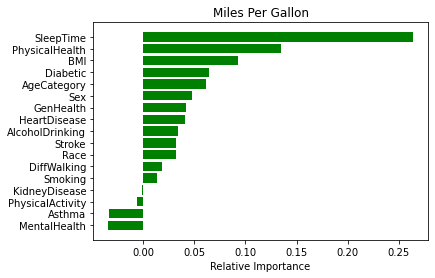

In [8]:
names=['BMI','MentalHealth','AlcoholDrinking','PhysicalActivity','Sex','GenHealth', 'Asthma','Diabetic','Smoking','SleepTime','PhysicalHealth','Stroke','KidneyDisease','DiffWalking','HeartDisease','Race','AgeCategory']
plt.title('Miles Per Gallon')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [9]:

for i in range(0, len(indices)):
    if np.abs(importances[i])>0.04:
        print(names[i])
        list.append(names[i])


BMI


TypeError: descriptor 'append' for 'list' objects doesn't apply to a 'str' object

In [ ]:
X= data[ ['BMI', 'Sex', 'GenHealth', 'Diabetic', 'SleepTime', 'PhysicalHealth','HeartDisease','AgeCategory']]

In [ ]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.03:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.18:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

BMI  is not correlated  with  Sex
BMI  is highly  correlated  with  Diabetic
BMI  is not correlated  with  AgeCategory
Sex  is not correlated  with  BMI
Sex  is not correlated  with  GenHealth
Sex  is not correlated  with  Diabetic
Sex  is not correlated  with  SleepTime
GenHealth  is not correlated  with  Sex
GenHealth  is not correlated  with  Diabetic
GenHealth  is not correlated  with  SleepTime
GenHealth  is not correlated  with  HeartDisease
Diabetic  is highly  correlated  with  BMI
Diabetic  is not correlated  with  Sex
Diabetic  is not correlated  with  GenHealth
Diabetic  is not correlated  with  SleepTime
Diabetic  is highly  correlated  with  AgeCategory
SleepTime  is not correlated  with  Sex
SleepTime  is not correlated  with  GenHealth
SleepTime  is not correlated  with  Diabetic
SleepTime  is not correlated  with  HeartDisease
HeartDisease  is not correlated  with  GenHealth
HeartDisease  is not correlated  with  SleepTime
HeartDisease  is highly  correlated  with  AgeC

In [ ]:
X= data[ ['AgeCategory', 'HeartDisease', 'Diabetic','BMI']]

In [ ]:
mi = mutual_info_regression(X, y)

<AxesSubplot:>

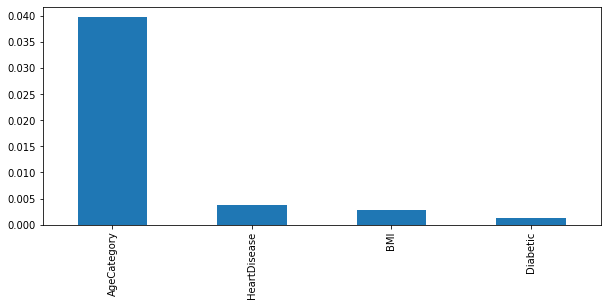

In [ ]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))